# <center> Customer Churn Prediction Using LSTM 👨🏻‍💻</center>

## <center>[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)</center>

<img src="https://media.tenor.com/b2kdbWrrNZQAAAAC/going-in-the-portal-tom-holland.gif" width="700" height="500">

# 1 <a id='1'>Introduction</a>
[Table of contents](#0.1)

Telecom or telecommunications industry is one of the fastest-growing and rapidly evolving industries. With the increasing competition, it has become more important than ever for telecom companies to retain their customers. In this context, predicting customer churn, i.e., the likelihood of a customer leaving a company, has become a crucial task for telecom companies.

This Telco Churn Prediction dataset, provided by IBM, contains a sample of customer data with attributes such as customer services, account information, and demographics. The dataset also includes a binary label indicating whether the customer has churned or not. The goal of this dataset is to predict whether a customer is likely to churn or not based on their profile and services subscribed.

By analyzing the customer data and developing retention strategies, telecom companies can not only retain their customers but also acquire new customers by attracting customers from their competitors. In this regard, machine learning models can be used to predict churn and identify the most important features that contribute to customer churn. This can help telecom companies develop focused customer retention programs and improve their business performance.

customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

# Table of Contents Diego 👨🏻‍💻<a id='0.1'></a>

* [Introduction](#1)
* [Data Modeling ](#2)
    * [Import Packages](#2.1)
    * [Custom Classes](#2.2)
    * [Data Preprocessing](#2.3)
        * [Data Reading](#2.3.1)
        * [Data Cleaning](#2.3.2)
        * [feature engineering](#2.3.3)
        * [Basic EDA](#2.3.4)
    * [Data Preprocessing](#2.4)
        * [LSTMClassifier](#2.4.1)
        * [Data Cleaning](#2.4.2)
        * [Evaluate](#2.4.3)
        * [LSTM Prediction](#2.4.4)
        * [Feature importance](#2.4.5)
        * [Save LSTM Model](#2.4.6)

# 2 <a id='2'> Data Modeling 📚</a>
[Table of contents](#0.1)

# 2.1 <a id='2.1'>Import Packages📚</a>
[Table of contents](#0.1)

In [1]:
# import os
# os.environ["SM_FRAMEWORK"] = "tf.keras"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from collections import Counter
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from math import sqrt
import sys

from scipy.stats import pearsonr

import category_encoders as ce
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, recall_score


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from six import StringIO 
import IPython, graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import re

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import json

plt.style.use('seaborn-dark-palette')
plt.rcParams["figure.figsize"] = [16, 8]

width = 1000
height = 750

bg_color = '#FFFFFF'
paper_bg = '#FFFFFF'

plt.rcParams.update({'font.size': 18})
color_charts = '#2baae2'
plt.style.use('ggplot')
color = '#16171f'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color

plt.rcParams.update({'text.color' : color,
                             'axes.labelcolor' : color})

plt.rcParams.update({'font.size': 17})
plt.rc('font', size=17)

from sklearn.metrics import precision_recall_curve, auc

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, recall_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout
from ydata_profiling import ProfileReport

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.inspection import permutation_importance
from sklearn.metrics import balanced_accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2095753692.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode

# 2.2 <a id='2.1'>Custom Classes🔍</a>
[Table of contents](#0.1)

In [3]:
class pipeline_churn_prediction():
    def __init__(self):
        self.project = 'churn prediction '
        
    def get_percent_missing(self, df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                             'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)
        
        print('Percentage of Missing Values: ')

        return percent_missing

In [4]:
def label_encode_features(df):
    """
    Encodes the specified categorical features of the given dataframe using Label Encoder.
    
    Parameters:
    df (pandas.DataFrame): The input dataframe.
    features (list): List of categorical features to be encoded.
    
    Returns:
    encoded_df (pandas.DataFrame): The encoded dataframe with the same columns as the input dataframe.
    """
    le = LabelEncoder()
    encoded_df = df.copy()
    
    features = [i for i in list(df.columns) if i not in list(df.describe().columns)]
    
    print('Label Encoder Transformation')
    for feature in features:
        encoded_df[feature] = le.fit_transform(encoded_df[feature])
        print(f'{feature}: {len(encoded_df[feature].unique())} unique value(s)')
        print(f'Unique values: {list(encoded_df[feature].unique())}\n')
        
    return encoded_df

In [5]:
def unique_counts(df):
    """
    Returns the number of unique values and unique values for each feature in the given dataframe.

    Parameters:
    df (pandas.DataFrame): The input dataframe.

    Returns:
    unique_counts_df (pandas.DataFrame): A dataframe containing the feature names, the number of unique values, the unique values, and the data type of each feature.
    """
    unique_counts = df.nunique()
    unique_values = [df[column].unique() for column in df.columns]
    data_types = [str(df[column].dtype) for column in df.columns]
    unique_counts_df = pd.DataFrame({'feature': df.columns, 'unique_count': unique_counts, 'unique_values': unique_values, 'data_type': data_types})
    return unique_counts_df

# 2.3 <a id='2.3'> Data Preprocessing 🔍</a>
[Table of contents](#0.1)

# 2.3.1 <a id='2.3.1'> Data Reading </a>
[Table of contents](#0.1)

In [6]:
plt.rcParams["figure.figsize"] = [16, 8]
pipeline_churn_diego = pipeline_churn_prediction()

df_train = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
id_sub = df_train.customerID
df_train = df_train.drop(df_train.columns[0],axis=1)

print(df_train.shape[0])
print(len(df_train.columns.tolist()))
df_train.head(1)

7043
20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [7]:
# Checking the missing values 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
pipeline_churn_diego.get_percent_missing(df_train)

Percentage of Missing Values: 


gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
df_train[['TotalCharges', 'MonthlyCharges']].head(5)

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.5,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# Describe the string data
df_train.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
df_train.select_dtypes(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


# 2.3.2 <a id='2.3.2'> Data Cleaning </a>
[Table of contents](#0.1)

In [13]:
df_train.loc[df_train['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df_train['TotalCharges'] = df_train['TotalCharges'].astype(float)
df_train.fillna(-99, inplace=True)

In [14]:
unique_counts(df_train.select_dtypes(include=['object']))

,feature,unique_count,unique_values,data_type
gender,gender,2,"[Female, Male]",object
Partner,Partner,2,"[Yes, No]",object
Dependents,Dependents,2,"[No, Yes]",object
PhoneService,PhoneService,2,"[No, Yes]",object
MultipleLines,MultipleLines,3,"[No phone service, No, Yes]",object
InternetService,InternetService,3,"[DSL, Fiber optic, No]",object
OnlineSecurity,OnlineSecurity,3,"[No, Yes, No internet service]",object
OnlineBackup,OnlineBackup,3,"[Yes, No, No internet service]",object
DeviceProtection,DeviceProtection,3,"[No, Yes, No internet service]",object
TechSupport,TechSupport,3,"[No, Yes, No internet service]",object


In [15]:
# Display the head of the data
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.3.3 <a id='2.3.3'> feature engineering </a>
[Table of contents](#0.1)

In [16]:
df_train['internet']= np.where(df_train.InternetService != 'No', 'Yes', 'No')

df_train['num_services'] = (df_train[['PhoneService', 'OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 
                                      'TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'internet']] == 'Yes').sum(axis=1)

df_train['Engaged'] = (df_train['Contract'] != 'Month-to-month').astype(int)
df_train['YandNotE'] = ((df_train['SeniorCitizen'] == 0) & (df_train['Engaged'] == 0)).astype(int)
df_train['ElectCheck'] = ((df_train['PaymentMethod'].eq('Electronic check')) & (df_train['Engaged'] == 0)).astype(int)
df_train['fiberopt'] = (df_train['InternetService'] != 'Fiber optic').astype(int)
df_train['StreamNoInt'] = (df_train['StreamingTV'] != 'No internet service').astype(int)
df_train['NoProt'] = ((df_train['OnlineBackup'] != 'No') | (df_train['DeviceProtection'] != 'No') | (df_train['TechSupport'] != 'No')).astype(int)

services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_train['TotalServices'] = df_train[services].eq('Yes').sum(axis=1)

In [17]:
df_train.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,internet,num_services,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Yes,2,0,1,1,1,1,1,1


In [18]:
df_train['Churn'] = df_train['Churn'].replace('Yes', 1)
df_train['Churn'] = df_train['Churn'].replace('No', 0)

In [19]:
# define the colors and fonts
colors = ['#E71D36', '#1F5673', '#F4D35E', '#EE964B']
font = dict(family='Arial', size=10)

#Label encoding Binary columns
le = LabelEncoder()
tmp_churn = df_train[df_train['Churn'] == 1]
tmp_no_churn = df_train[df_train['Churn'] == 0]
bi_cs = df_train.nunique()[df_train.nunique() == 2].keys()
dat_rad = df_train[bi_cs]

for cols in bi_cs :
    tmp_churn[cols] = le.fit_transform(tmp_churn[cols])

data_frame_x = tmp_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(), 
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 1's",
                         mode = "markers+lines", visible=True,
                         line=dict(color=colors[0], width=2),
                         marker = dict(size = 8, color=colors[0])
                        )

#count of 0's(No)
trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 0's",
                         mode = "markers+lines", visible=True,
                         line=dict(color=colors[1], width=2),
                         marker = dict(size = 8, color=colors[1])
                        ) 

for cols in bi_cs :
    tmp_no_churn[cols] = le.fit_transform(tmp_no_churn[cols])

data_frame_x = tmp_no_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_no_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace3 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 1's",
                         mode = "markers+lines", visible=False,
                         line=dict(color=colors[2], width=2),
                         marker = dict(size = 8, color=colors[2])
                        )

#count of 0's(No)
trace4 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 0's",
                         mode = "markers+lines", visible=False,
                         line=dict(color=colors[3], width=2),
                         marker = dict(size = 8, color=colors[3])
                        ) 

data = [trace1, trace2, trace3, trace4]

updatemenus = list([
    dict(active=0,
         x=-0.15,
         buttons=list([  
            dict(
                label = 'Churn Dist',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]}, 
                     {'title': 'Customer Churn Binary Counting Distribution'}]),
             
             dict(
                  label = 'No-Churn Dist',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                     {'title': 'No Customer Churn Binary Counting Distribution'}]),

        ]),
    )
])

# update the layout
layout = dict(
    title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
    showlegend=False,
    updatemenus=updatemenus,
    font=font,
    polar=dict(
        radialaxis=dict(
            visible=True,
            showticklabels=True,
            tickangle=0,
            tickfont=dict(family='Arial', size=10),
            ticksuffix=' customers',
            ticklen=10,
            range=[0, 1800]
        ),
        angularaxis=dict(
            tickfont=dict(family='Arial', size=10),
            ticks='outside',
            tickcolor='#DDD',
            ticklen=10
        ),
    ),
    paper_bgcolor='rgb(240,240,240)',
    plot_bgcolor='rgb(240,240,240)',
)

# create the figure and apply the layout
fig = dict(data=data, layout=layout)

# show the chart
iplot(fig)

/tmp/ipykernel_20/92431215.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/92431215.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/92431215.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/92431215.p

In [20]:
df_train = label_encode_features(df_train)

Label Encoder Transformation
gender: 2 unique value(s)
Unique values: [0, 1]

Partner: 2 unique value(s)
Unique values: [1, 0]

Dependents: 2 unique value(s)
Unique values: [0, 1]

PhoneService: 2 unique value(s)
Unique values: [0, 1]

MultipleLines: 3 unique value(s)
Unique values: [1, 0, 2]

InternetService: 3 unique value(s)
Unique values: [0, 1, 2]

OnlineSecurity: 3 unique value(s)
Unique values: [0, 2, 1]

OnlineBackup: 3 unique value(s)
Unique values: [2, 0, 1]

DeviceProtection: 3 unique value(s)
Unique values: [0, 2, 1]

TechSupport: 3 unique value(s)
Unique values: [0, 2, 1]

StreamingTV: 3 unique value(s)
Unique values: [0, 2, 1]

StreamingMovies: 3 unique value(s)
Unique values: [0, 2, 1]

Contract: 3 unique value(s)
Unique values: [0, 1, 2]

PaperlessBilling: 2 unique value(s)
Unique values: [1, 0]

PaymentMethod: 4 unique value(s)
Unique values: [2, 3, 0, 1]

internet: 2 unique value(s)
Unique values: [1, 0]



In [21]:
col = list(df_train.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df_train[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn internet Engaged YandNotE ElectCheck fiberopt StreamNoInt NoProt


In [22]:
print('Numerical Features :',*numerical_features)

Numerical Features : tenure MonthlyCharges TotalCharges num_services TotalServices


In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df_train['MonthlyCharges_Group'] = [int(i / 5) for i in df_train['MonthlyCharges']]
df_train['TotalCharges_Group'] = [int(i / 500) for i in df_train['TotalCharges']]

df_train.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df_train['tenure'] = mms.fit_transform(df_train[['tenure']])
df_train['MonthlyCharges'] = mms.fit_transform(df_train[['MonthlyCharges']])
df_train['TotalCharges'] = mms.fit_transform(df_train[['TotalCharges']])
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,internet,num_services,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices
0,0,0,1,0,0.013889,0,1,0,0,2,...,0,1,2,0,1,1,1,1,1,1
1,1,0,0,0,0.472222,1,0,0,2,0,...,0,1,4,1,0,0,1,1,1,3
2,1,0,0,0,0.027778,1,0,0,2,2,...,1,1,4,0,1,0,1,1,1,3
3,1,0,0,0,0.625000,0,1,0,2,0,...,0,1,4,1,0,0,1,1,1,3
4,0,0,0,0,0.027778,1,0,1,0,0,...,1,1,2,0,1,1,0,1,0,1


In [24]:
unique_counts(df_train)

,feature,unique_count,unique_values,data_type
gender,gender,2,"[0, 1]",int64
SeniorCitizen,SeniorCitizen,2,"[0, 1]",int64
Partner,Partner,2,"[1, 0]",int64
Dependents,Dependents,2,"[0, 1]",int64
tenure,tenure,73,"[0.013888888888888888, 0.4722222222222222, 0.0...",float64
PhoneService,PhoneService,2,"[0, 1]",int64
MultipleLines,MultipleLines,3,"[1, 0, 2]",int64
InternetService,InternetService,3,"[0, 1, 2]",int64
OnlineSecurity,OnlineSecurity,3,"[0, 2, 1]",int64
OnlineBackup,OnlineBackup,3,"[2, 0, 1]",int64


In [25]:
df_train.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,internet,num_services,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices
0,0,0,1,0,0.013889,0,1,0,0,2,...,0,1,2,0,1,1,1,1,1,1


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Split the dataset into X and y
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']

# Fit a Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X, y)

# Get the feature importance scores
importance_scores = model.feature_importances_

# Create a list of feature names and their importance scores
feature_importance = list(zip(X.columns, importance_scores))

# Sort the features by importance score in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

df_feature_importance = pd.DataFrame(feature_importance, columns=['feature', 'importance_score'])

df_feature_importance

,feature,importance_score
0,TotalCharges,0.169882
1,MonthlyCharges,0.156118
2,tenure,0.139079
3,Contract,0.060967
4,Engaged,0.039003
5,ElectCheck,0.033962
6,PaymentMethod,0.033961
7,OnlineSecurity,0.030801
8,gender,0.027377
9,num_services,0.025581


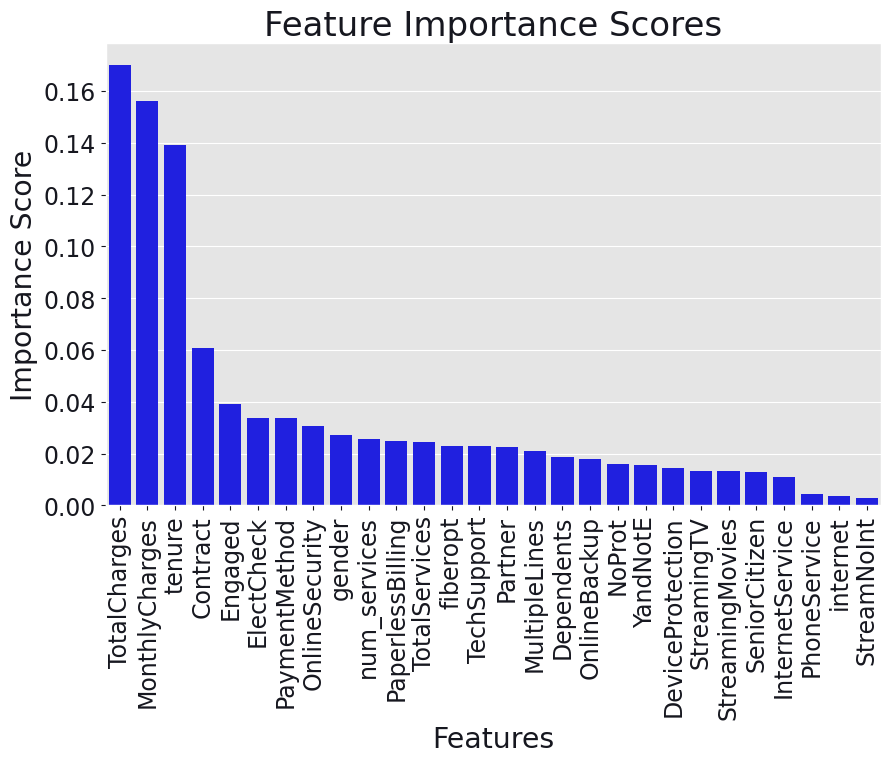

In [28]:
# Create a bar chart to show the feature importance
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x and y values
x_values = [x[0] for x in feature_importance]
y_values = [x[1] for x in feature_importance]

# Plot the bar chart
sns.barplot(x=x_values, y=y_values, ax=ax, color='b')

# Set the x-axis labels to be rotated
plt.xticks(rotation=90)

# Set the title and labels
ax.set_title('Feature Importance Scores')
ax.set_xlabel('Features')
ax.set_ylabel('Importance Score')
plt.show()

In [29]:
# Keep only the top 10 most important features
top_features = [feature for feature, score in feature_importance[:15]]

# Create a new dataset with only the top features
df_train = df_train[top_features]

In [30]:
# Threshold for removing correlated variables
threshold = 0.90

# Absolute value correlation matrix
corr_matrix = df_train.corr().abs()

# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 2 columns to remove.
['Engaged', 'TotalServices']


/tmp/ipykernel_20/3193730070.py:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [31]:
df_train = df_train.drop(columns = to_drop)
print('Training shape: ', df_train.shape)

Training shape:  (7043, 13)


In [32]:
df_train['churn'] = y

In [33]:
df_train.head(5)

,TotalCharges,MonthlyCharges,tenure,Contract,ElectCheck,PaymentMethod,OnlineSecurity,gender,num_services,PaperlessBilling,fiberopt,TechSupport,Partner,churn
0,0.014669,0.115423,0.013889,0,1,2,0,0,2,1,1,0,1,0
1,0.226383,0.385075,0.472222,1,0,3,2,1,4,0,1,0,0,0
2,0.023583,0.354229,0.027778,0,0,3,2,1,4,1,1,0,0,1
3,0.220833,0.239303,0.625000,1,0,0,2,1,4,0,1,2,0,0
4,0.028535,0.521891,0.027778,0,1,2,0,0,2,1,0,0,0,1


# 2.3.4 <a id='2.3.4'> Super Basic EDA </a>
[Table of contents](#0.1)

In [34]:
profile = ProfileReport(df_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
df_train.head(1)

,TotalCharges,MonthlyCharges,tenure,Contract,ElectCheck,PaymentMethod,OnlineSecurity,gender,num_services,PaperlessBilling,fiberopt,TechSupport,Partner,churn
0,0.014669,0.115423,0.013889,0,1,2,0,0,2,1,1,0,1,0


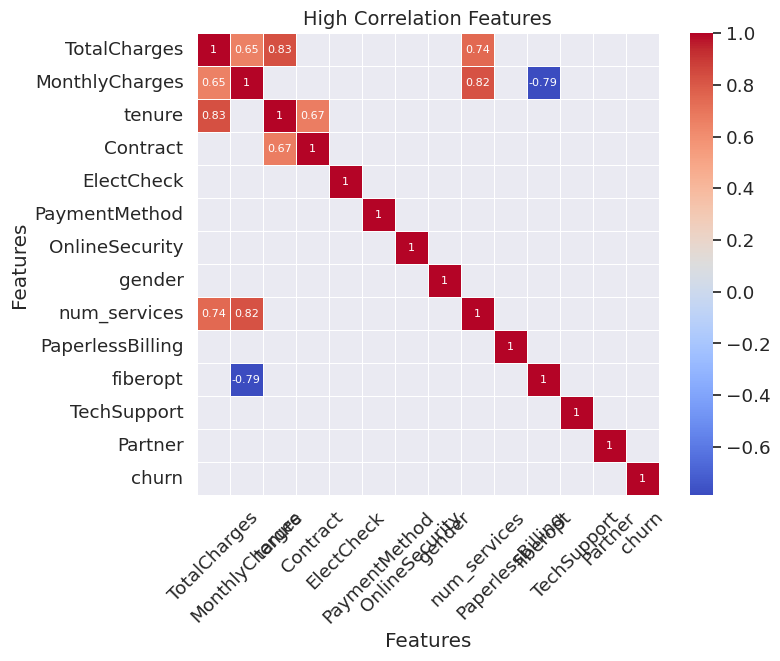

In [36]:
# calculate correlation and filter for high correlation
corr = df_train.corr()
high_corr = corr[abs(corr) > 0.6]

# create heatmap with improved style
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(high_corr, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=.5, cbar=True, square=True, ax=ax)
ax.set_title('High Correlation Features', fontsize=14)
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

In [37]:
print (pearsonr(df_train['MonthlyCharges'], df_train['TechSupport'])[0])

-0.008681601970787137


# 2.4 <a id='2.4'> Model 🔍</a>
[Table of contents](#0.1)

# 2.4.1 <a id='2.4.1'> LSTMClassifier </a>
[Table of contents](#0.1)

In [38]:
# Define the function to create the LSTM model outside the class
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the LSTMClassifier class
class LSTMClassifier:
    
    """
    
    Class Created by: Diego Gustavo Hurtado Olivares
    
    LSTMClassifier is a class that provides an easy-to-use interface for training, evaluating, 
    and tuning Long Short-Term Memory (LSTM) models for binary classification tasks.
    
    This class includes methods for preprocessing data, building and training the LSTM model,
    evaluating the model using various metrics, plotting the training history and ROC curve,
    predicting new instances, saving and loading the model, and obtaining feature importances 
    using permutation importance. It also provides support for hyperparameter tuning, K-fold
    cross-validation, and early stopping.
    
    Example usage:
    --------------
    
    # Initialize the LSTMClassifier with your data
    lstm_classifier = LSTMClassifier(data)
    
    # Preprocess the data
    lstm_classifier.preprocess_data()
    
    # Build the LSTM model
    lstm_classifier.build_model()
    
    # Train the model
    history = lstm_classifier.train_model(epochs=50, batch_size=32)
    
    # Evaluate the model
    lstm_classifier.evaluate_model()
    
    # Plot the training history and ROC curve
    lstm_classifier.plot_training_history(history)
    lstm_classifier.plot_roc_curve()
    
    # Predict new instances
    y_pred = lstm_classifier.predict(X_new)
    
    """
    
    def __init__(self, data):
        # Initialize the data path and variables to store the data, train and test sets, and model
        # self.data_path = data_path
        self.data = data
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = None
        self.model = None
        
    def load_data(self):
        # Load the data from the specified path
        self.data = pd.read_csv(self.data_path)
        
    def preprocess_data(self):
        # Split the data into features (X) and target (y)
        X = self.data.drop(["churn"], axis=1)
        y = self.data["churn"]
        
        # Split the data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Standardize the features
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        # Reshape the features to be 3D arrays suitable for input into an LSTM model
        self.X_train = np.reshape(self.X_train, (self.X_train.shape[0], 1, self.X_train.shape[1]))
        self.X_test = np.reshape(self.X_test, (self.X_test.shape[0], 1, self.X_test.shape[1]))
        
    def build_model(self):
        # Create a sequential model with two LSTM layers, two dropout layers, and a dense output layer
        self.model = Sequential()
        self.model.add(LSTM(64, input_shape=(1, self.X_train.shape[2]), return_sequences=True))
        self.model.add(Dropout(0.2))
        self.model.add(LSTM(32))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(1, activation='sigmoid'))
        # Compile the model with the binary crossentropy loss function, the Adam optimizer, and accuracy metrics
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def early_stopping(self, patience=10, restore_best_weights=True):
        return EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=restore_best_weights)
    
    def custom_metric(self, y_true, y_pred):
        # Example: Implement the balanced accuracy metric
        balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
        return balanced_accuracy
    
        
    def evaluate_model(self, use_custom_metric=True):
        y_pred_prob = self.model.predict(self.X_test)
        y_pred_rounded = np.round(y_pred_prob)
        y_pred = y_pred_rounded.astype(int).ravel()

        # Evaluation metrics
        confusion_mat = confusion_matrix(self.y_test, y_pred)
        classification_re = classification_report(self.y_test, y_pred)
        accuracy = accuracy_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)

        # Print the evaluation metrics
        print("Confusion Matrix:")
        print(confusion_mat)
        print("Classification Report:")
        print(classification_re)
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print("Recall:", recall)

        if use_custom_metric:
            custom_metric_value = self.custom_metric(self.y_test, y_pred)
            print("Custom Metric Value (Balanced Accuracy):", custom_metric_value)
        
    def plot_training_history(self, history):
        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 5))
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.figure(figsize=(12, 5))
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

    def plot_roc_curve(self):
        y_pred_prob = self.model.predict(self.X_test).ravel()
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob)
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        
    def predict(self, X):
        # Preprocess input
        X_scaled = self.scaler.transform(X)
        X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
        
        # Make predictions
        y_pred_prob = self.model.predict(X_reshaped)
        y_pred_rounded = np.round(y_pred_prob)
        y_pred = y_pred_rounded.astype(int).ravel()
        return y_pred

    def save_model(self, model_path):
        self.model.save(model_path)

    def load_model(self, model_path):
        self.model = load_model(model_path)

    def get_model_summary(self):
        self.model.summary()
        
    def tune_hyperparameters(self, param_grid, cv=5, search_type='grid', n_iter=None, random_state=42):
        input_shape = (1, self.X_train.shape[2])

        # Wrap the model for use with scikit-learn
        model = KerasClassifier(build_fn=lambda: create_lstm_model(input_shape), verbose=0)

        if search_type == 'grid':
            search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
        elif search_type == 'random':
            if n_iter is None:
                raise ValueError("n_iter must be specified for random search.")
            search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=cv,
                                        n_iter=n_iter, random_state=random_state)

        search_result = search.fit(self.X_train, self.y_train)

        # Print the best score and best parameters
        print("Best score: %f using %s" % (search_result.best_score_, search_result.best_params_))
        return search_result

    def k_fold_cross_validation(self, n_splits=5, epochs=50, batch_size=32):
        input_shape = (1, self.X_train.shape[2])

        # Define a function to create the model with the proper input shape
        def create_model():
            return create_lstm_model(input_shape)

        # Wrap the model for use with scikit-learn
        model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

        # Perform k-fold cross-validation
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        results = cross_val_score(model, self.X_train, self.y_train, cv=kfold)

        # Print the mean and standard deviation of the cross-validation scores
        print("Cross-Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

    def model_to_json(self):
        model_json = self.model.to_json()
        return model_json

    def json_to_model(self, model_json):
        self.model = model_from_json(model_json)
        
    def predict_proba(self, X):
        X_scaled = self.scaler.transform(X)
        X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
        y_pred_prob = self.model.predict(X_reshaped)
        return y_pred_prob

    def train_val_split(self, val_size=0.1, random_state=42):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X_train, self.y_train, test_size=val_size, random_state=random_state)

        # Reshape X_val using the same number of features as in X_train and X_test
        self.X_val = np.reshape(self.X_val, (self.X_val.shape[0], 1, self.X_train.shape[2]))


    def learning_rate_reduction(self, factor=0.1, patience=10, min_lr=1e-5):
        return ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, min_lr=min_lr)

    def train_model(self, epochs, batch_size, use_early_stopping=True, use_lr_reduction=True):
        callbacks = []
        if use_early_stopping:
            callbacks.append(self.early_stopping())
        if use_lr_reduction:
            callbacks.append(self.learning_rate_reduction())

        history = self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size,
                                 validation_data=(self.X_test, self.y_test), callbacks=callbacks)
        return history
    
    def get_feature_importance(self, X, y, n_repeats=10, random_state=42):
        # Wrap the predict_proba method for use with sklearn's permutation_importance function
        def predict_proba_wrapped(X):
            return self.predict_proba(X)

        # Compute the permutation importance
        result = permutation_importance(predict_proba_wrapped, X, y, n_repeats=n_repeats,
                                        random_state=random_state, n_jobs=-1)

        # Combine the feature importances and their names into a dataframe and sort by importance
        feature_importance = pd.DataFrame({'feature': self.data.drop(["churn"], axis=1).columns,
                                           'importance': result.importances_mean,
                                           'std': result.importances_std})

        feature_importance = feature_importance.sort_values(by='importance', ascending=False)

        return feature_importance

# 2.4.2 <a id='2.4.2'> LSTM Training </a>
[Table of contents](#0.1)

In [39]:
# Instantiate the LSTMClassifier
lstm_classifier = LSTMClassifier(df_train)

# Preprocess the data
lstm_classifier.preprocess_data()

# Split the training data into training and validation sets
lstm_classifier.train_val_split()

# Build the model
lstm_classifier.build_model()

# Train the model with early stopping and learning rate reduction
history = lstm_classifier.train_model(epochs=1000, batch_size=128)

Epoch 1/1000
40/40 [==============================] - 6s 32ms/step - loss: 0.6498 - accuracy: 0.7460 - val_loss: 0.5748 - val_accuracy: 0.7963 - lr: 0.0010
Epoch 2/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.5047 - accuracy: 0.7765 - val_loss: 0.4327 - val_accuracy: 0.7913 - lr: 0.0010
Epoch 3/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.4451 - accuracy: 0.7817 - val_loss: 0.4195 - val_accuracy: 0.7999 - lr: 0.0010
Epoch 4/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.4406 - accuracy: 0.7868 - val_loss: 0.4155 - val_accuracy: 0.8020 - lr: 0.0010
Epoch 5/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.4373 - accuracy: 0.7899 - val_loss: 0.4122 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 6/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.4336 - accuracy: 0.7937 - val_loss: 0.4099 - val_accuracy: 0.8006 - lr: 0.0010
Epoch 7/1000
40/40 [==============================] - 0s 8ms/step - l

In [40]:
# Tune hyperparameters
param_grid = {
    'epochs': [25, 50],
    'batch_size': [32, 64]
}

# grid_result = lstm_classifier.tune_hyperparameters(param_grid)

# Perform k-fold cross-validation
# lstm_classifier.k_fold_cross_validation(n_splits=5, epochs=50, batch_size=32)

# 2.4.3 <a id='2.4.3'> Evaluate </a>
[Table of contents](#0.1)

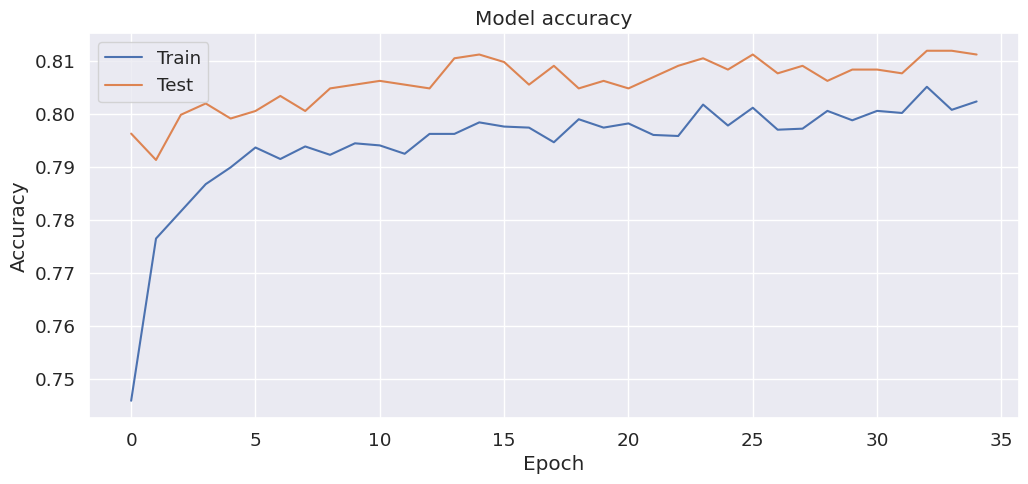

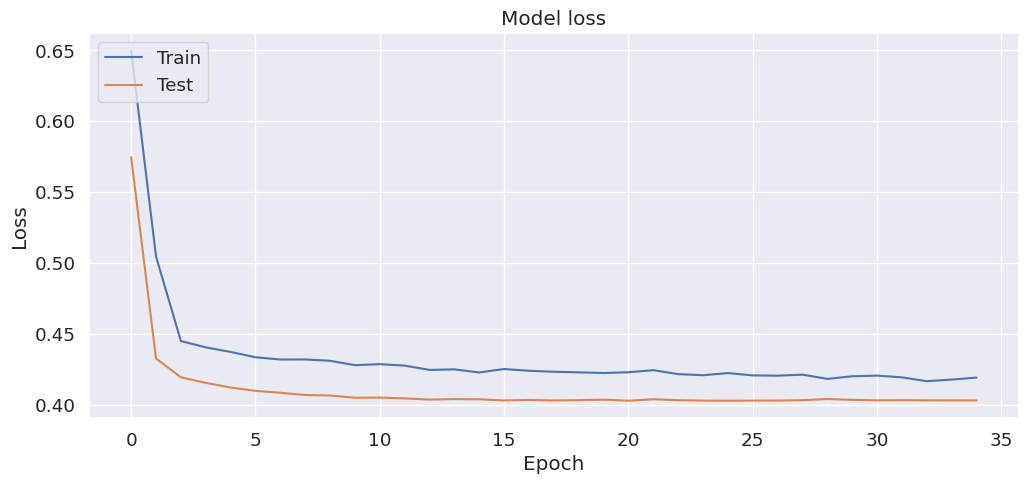

In [41]:
# Plot the training history
lstm_classifier.plot_training_history(history)

In [42]:
# Evaluate the model
lstm_classifier.evaluate_model()

45/45 [==============================] - 1s 2ms/step
Confusion Matrix:
[[937  99]
 [171 202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy: 0.808374733853797
F1 Score: 0.5994065281899109
Recall: 0.5415549597855228
Custom Metric Value (Balanced Accuracy): 0.7229975571128386


45/45 [==============================] - 0s 2ms/step


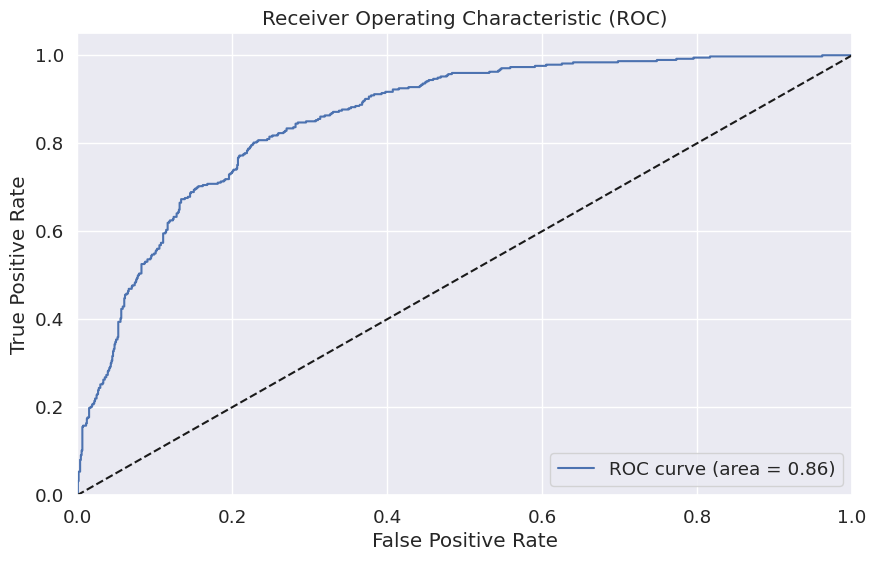

In [43]:
# Plot the ROC curve
lstm_classifier.plot_roc_curve()

# 2.4.4 <a id='2.4.4'> LSTM Prediction </a>
[Table of contents](#0.1)

In [44]:
# y_pred_prob = lstm_classifier.predict_proba(df_test)

In [45]:
# predicted = lstm_classifier.predict(df_test)

In [46]:
# submission = pd.DataFrame({'id':id_sub, 'churn':predicted})
# submission.head(5)

In [47]:
# submission.churn.replace([0,1],['no','yes'], inplace=True)

In [48]:
# submission.to_csv('submission.csv',index=False)

# 2.4.5 <a id='2.4.5'> Feature importance </a>
[Table of contents](#0.1)

In [49]:
# Get feature importances
# feature_importances = lstm_classifier.get_feature_importance(X_test, y_test)

# Print the feature importances
# print("Feature importances:")
# print(feature_importances)

# 2.4.6 <a id='2.4.'> Save LSTM Model </a>
[Table of contents](#0.1)

In [50]:
# Save the model to disk
# classifier.save_model('lstm_model.h5')

# Load the model from disk
# classifier.load_model('lstm_model.h5')

# Save the model architecture as a JSON string
# model_json = classifier.model_to_json()

# Load the model architecture from a JSON string
# classifier.json_to_model(model_json)

# Print the model architecture summary
# classifier.get_model_summary()

# Thanks 

<img src="https://lh5.googleusercontent.com/9ROjm25aJ9h7n9dPSco1C0OOnEOdYXxO1omW_gAj6SUasnKVE3bqKMcLKzj0ZzLUUvBzrVHrnY2tYGLdJECV2X5_09Q1JAHv_zS3EvNGRNf6IoX9nEQkpPOa67hhBk6yQS53C1Hf" width="400" height="400">

<img src="https://www.vectorlogo.zone/logos/linkedin/linkedin-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
## [Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

<img src="https://www.vectorlogo.zone/logos/github/github-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
## [Msc. Diego Hurtado](https://github.com/DiegoHurtad0)

<img src="https://www.vectorlogo.zone/logos/medium/medium-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
## [Msc. Diego O’HURTADO](https://medium.com/@diego.hurtado.olivares)

<img src="https://raw.githubusercontent.com/DiegoHurtad0/Covid-19-Dataset-Mexico/master/wave.svg" width="900" height="600">

## [Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

## “When you are asked if you can do a job, tell ’em, ‘Certainly I can!’ Then get busy and find out how to do it.” — Theodore Roosevelt.